<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 4.1.2 Linear Regression

## Prediction of House Price Using Linear Regression

### Data

The Sacramento real estate transactions file is a list of 985 real estate transactions in the Sacramento area reported over a five-day period, as reported by the Sacramento Bee.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

import pandas as pd
import numpy as np
import math
import seaborn as sns
import pandas as pd

from scipy import stats
from matplotlib import pyplot as plt

%matplotlib inline

### 1. Explore Data

Perform EDA on this dataset. Find Dependent and Independent Variables to predict house price.

In [2]:
# Read CSV
#house_csv = "Sacramento_transactions.csv"

house_csv = pd.read_csv("Sacramento_transactions.csv")

#Step 1 understand data
house_csv.head()


street        city    zip state  beds  baths  sq__ft  \
0      3526 HIGH ST  SACRAMENTO  95838    CA     2      1     836   
1       51 OMAHA CT  SACRAMENTO  95823    CA     3      1    1167   
2    2796 BRANCH ST  SACRAMENTO  95815    CA     2      1     796   
3  2805 JANETTE WAY  SACRAMENTO  95815    CA     2      1     852   
4   6001 MCMAHON DR  SACRAMENTO  95824    CA     2      1     797   

          type                     sale_date  price   latitude   longitude  
0  Residential  Wed May 21 00:00:00 EDT 2008  59222  38.631913 -121.434879  
1  Residential  Wed May 21 00:00:00 EDT 2008  68212  38.478902 -121.431028  
2  Residential  Wed May 21 00:00:00 EDT 2008  68880  38.618305 -121.443839  
3  Residential  Wed May 21 00:00:00 EDT 2008  69307  38.616835 -121.439146  
4  Residential  Wed May 21 00:00:00 EDT 2008  81900  38.519470 -121.435768

In [3]:
house_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   street     985 non-null    object 
 1   city       985 non-null    object 
 2   zip        985 non-null    int64  
 3   state      985 non-null    object 
 4   beds       985 non-null    int64  
 5   baths      985 non-null    int64  
 6   sq__ft     985 non-null    int64  
 7   type       985 non-null    object 
 8   sale_date  985 non-null    object 
 9   price      985 non-null    int64  
 10  latitude   985 non-null    float64
 11  longitude  985 non-null    float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.5+ KB


In [4]:
house_csv.shape

(985, 12)

In [5]:
house_csv.columns

Index(['street', 'city', 'zip', 'state', 'beds', 'baths', 'sq__ft', 'type',
       'sale_date', 'price', 'latitude', 'longitude'],
      dtype='object')

In [6]:
house_csv.describe()

zip        beds       baths       sq__ft          price  \
count    985.000000  985.000000  985.000000   985.000000     985.000000   
mean   95750.697462    2.911675    1.776650  1314.916751  234144.263959   
std       85.176072    1.307932    0.895371   853.048243  138365.839085   
min    95603.000000    0.000000    0.000000     0.000000    1551.000000   
25%    95660.000000    2.000000    1.000000   952.000000  145000.000000   
50%    95762.000000    3.000000    2.000000  1304.000000  213750.000000   
75%    95828.000000    4.000000    2.000000  1718.000000  300000.000000   
max    95864.000000    8.000000    5.000000  5822.000000  884790.000000   

         latitude   longitude  
count  985.000000  985.000000  
mean    38.607732 -121.355982  
std      0.145433    0.138278  
min     38.241514 -121.551704  
25%     38.482717 -121.446127  
50%     38.626582 -121.376220  
75%     38.695589 -121.295778  
max     39.020808 -120.597599

In [7]:
#Step 2 clean data
house_csv.isnull().sum()

street       0
city         0
zip          0
state        0
beds         0
baths        0
sq__ft       0
type         0
sale_date    0
price        0
latitude     0
longitude    0
dtype: int64

In [8]:
#The data is clean as their are no null values in the data set.

In [9]:
#Step 3 Analyse the relationships between the variables

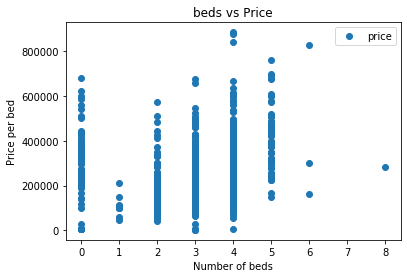

In [10]:
house_csv.plot(x='beds', y='price', style='o')
plt.title('beds vs Price')
plt.xlabel('Number of beds')
plt.ylabel('Price per bed')
plt.show()

(array([ 96., 269., 304., 160.,  76.,  43.,  22.,  10.,   1.,   4.]),
 array([  1551. ,  89874.9, 178198.8, 266522.7, 354846.6, 443170.5,
        531494.4, 619818.3, 708142.2, 796466.1, 884790. ]),
 <a list of 10 Patch objects>)

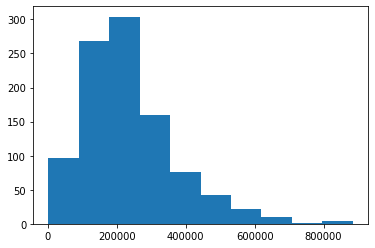

In [11]:
plt.hist(house_csv['price'])

(array([108.,  10., 133., 413.,   0., 258.,  59.,   3.,   0.,   1.]),
 array([0. , 0.8, 1.6, 2.4, 3.2, 4. , 4.8, 5.6, 6.4, 7.2, 8. ]),
 <a list of 10 Patch objects>)

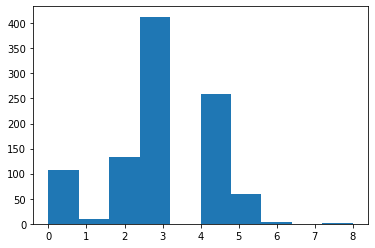

In [12]:
plt.hist(house_csv['beds'])

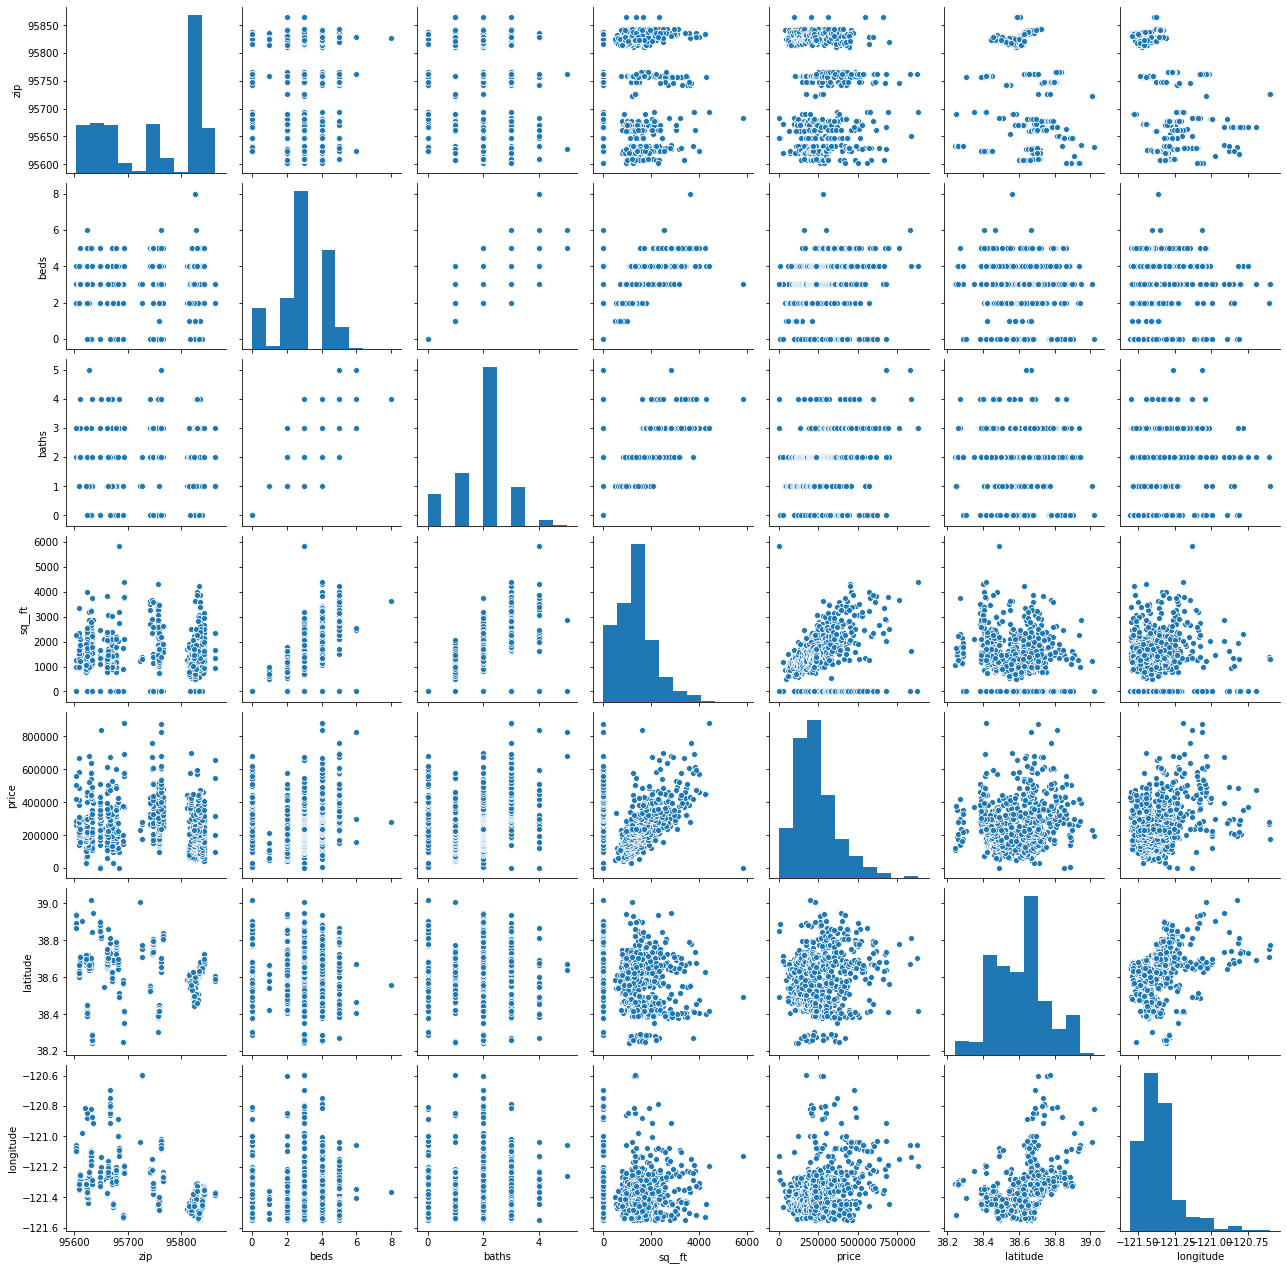

In [13]:
sns.pairplot(house_csv)

### 2. Predict Price

We are going to predict `price` from available information.

#### 2.1 What is the Target Variable? Why?

The target variable is the price because we are trying to check the price for sq_ft, beds, baths, city.

#### 2.2 List all possible variables which might be Independent/Predictor variable.

In [14]:
# ANSWER

sq_ft, beds, baths, city. All other variables except price are predictor variables but that which are numeric.

#### 2.3 Find correlation between variables

Find correlation between variables. Which is the best predictor? Why? State your reason.

In [15]:
# ANSWER
correlation = house_csv.corr()
correlation

zip      beds     baths    sq__ft     price  latitude  \
zip        1.000000  0.125319  0.069165  0.130108 -0.093353 -0.290389   
beds       0.125319  1.000000  0.839650  0.684041  0.342024 -0.291307   
baths      0.069165  0.839650  1.000000  0.665690  0.416208 -0.235792   
sq__ft     0.130108  0.684041  0.665690  1.000000  0.333897 -0.383274   
price     -0.093353  0.342024  0.416208  0.333897  1.000000 -0.039573   
latitude  -0.290389 -0.291307 -0.235792 -0.383274 -0.039573  1.000000   
longitude -0.539904 -0.053993  0.016582 -0.177742  0.284485  0.387925   

           longitude  
zip        -0.539904  
beds       -0.053993  
baths       0.016582  
sq__ft     -0.177742  
price       0.284485  
latitude    0.387925  
longitude   1.000000

# ANSWER
correlation
The best predictor is beds 0.342024, baths 0.416208, sq_ft 0.333897 as it has a strong correlation with price as well as longitude 0.284485

#### 2.4 Find Coefficient and Intercept using Linear Regression

Using LinearRegression of sklearn.linear_model package find Coefficient and Intercept.

Create an instance of LinearRegression.

Explore following methods:

- fit
- predict
- score

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

lm = linear_model.LinearRegression()


##### 2.4.1 Fit predictor and target variables using linear regression 

In [25]:
# ANSWER

X = house_csv['sq__ft'].values.reshape(-1,1)
Y =  house_csv['price']

model = lm.fit(X,Y)
print(model.coef_)
print(model.intercept_)

print(model.score(X,Y))

[54.15863969]
162930.16140699777
0.11148717682951437


##### 2.4.2 Find R Score

Find $R^2$ Using ```score``` method of Linear Regression.

In [28]:
# ANSWER
from sklearn.metrics import r2_score 

r2 = r2_score(X,Y)
print('r2 score for current model is', r2) 

r2 score for perfect model is -100771.96107484534


### 3. Splitting Data

In [29]:
from sklearn.model_selection import train_test_split


#### 3.1 Create training and testing subsets

Hint: Using `train_test_split` Library.

```
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
```

In [33]:
# ANSWER
## Create training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=42)

#### 3.2 Check Shape, Sample of Test Train Data

In [38]:
# ANSWER
## Check training/test data
print(X_train.shape)
print(X_test.shape)

print(X_train)
print(X_test)

(659, 1)
(326, 1)
[[1758]
 [1643]
 [2354]
 [   0]
 [1354]
 [   0]
 [ 958]
 [1232]
 [ 888]
 [1440]
 [1051]
 [1266]
 [2575]
 [1915]
 [1718]
 [2109]
 [   0]
 [2052]
 [1039]
 [2169]
 [2110]
 [1691]
 [1316]
 [1380]
 [   0]
 [ 722]
 [   0]
 [1219]
 [   0]
 [1686]
 [1627]
 [ 722]
 [1104]
 [1120]
 [1264]
 [   0]
 [3173]
 [   0]
 [1751]
 [3433]
 [2592]
 [   0]
 [1137]
 [1816]
 [1922]
 [   0]
 [1450]
 [   0]
 [ 952]
 [1207]
 [   0]
 [3612]
 [   0]
 [1943]
 [1407]
 [1766]
 [2457]
 [   0]
 [ 901]
 [1872]
 [2004]
 [1578]
 [1513]
 [1302]
 [ 623]
 [1590]
 [1479]
 [1477]
 [ 884]
 [1650]
 [1768]
 [   0]
 [1770]
 [1510]
 [2789]
 [1112]
 [ 588]
 [1351]
 [1424]
 [1285]
 [2126]
 [ 804]
 [1448]
 [1130]
 [1555]
 [1450]
 [   0]
 [ 966]
 [ 625]
 [1441]
 [   0]
 [ 871]
 [1120]
 [ 958]
 [   0]
 [   0]
 [   0]
 [1348]
 [2877]
 [2484]
 [2346]
 [   0]
 [   0]
 [1051]
 [1580]
 [1502]
 [   0]
 [1800]
 [1800]
 [1067]
 [   0]
 [1169]
 [1206]
 [1302]
 [1390]
 [1451]
 [1511]
 [2213]
 [1272]
 [   0]
 [   0]
 [2372]
 [2494

In [44]:
print(y_train.shape)
print(y_test.shape)

print(y_train)

print(y_test)

(659,)
(326,)
433    217500
172     99000
125    335750
541    488750
879    104000
        ...  
106    280908
270    275000
860    610000
435    220000
102    265000
Name: price, Length: 659, dtype: int64
613     77000
451    236000
731    240971
436    221000
275    293993
        ...  
697    205000
797    325000
328    572500
525    408431
971    224000
Name: price, Length: 326, dtype: int64


#### 3.3 Using Linear Regression Find The Score

1. Fit model using X_train, y_train
2. Find score using X_test, y_test

In [50]:
# ANSWER
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

model = LinearRegression().fit(X_train,y_train)
model.intercept_
#166482.34144968854
model.coef_
#array([47.43508406])

array([47.43508406])

In [52]:
# ANSWER
model.score(X_test,y_test)
#0.13602012247180006

model.score(X_train,y_train)
#0.0861471101156761

0.0861471101156761

### 4. Predict House Price

Let's assume we have information of following house:

- street:	1140 EDMONTON DR
- city:	SACRAMENTO
- zip:	95833
- state:	CA
- beds:	3
- baths:	2
- sq__ft:	1204
- type:	Residential

**Predict the price of this house using linear regression model.**

In [71]:
# ANSWER
sqft = 1204
beds = 3
baths = 2


X1 = sqft,beds,baths
X =  X1

#values.reshape(-1,1)
Y =  house_csv['price']


model = lm.fit(X,Y)
print(model.coef_)
print(model.intercept_)

print(model.score(X,Y))

ValueError: Expected 2D array, got 1D array instead:
array=[1204    3    2].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

#### Find the error

In [ ]:
# Predict price from X_test



---



---



> > > > > > > > > © 2019 Institute of Data


---



---



